# Manipulating Data

Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd

# Helper Functions to keep notebook clean
import functions as func

Define file and folder paths

In [2]:
PATH = os.getcwd() + "/"

#PCD_pickle_raw = os.path.join(PATH, 'DATA/pickle/PCD_raw.pkl')
PCD_pickle_raw = PATH + 'DATA/pickle/PCD_raw.pkl'
ICSD_pickle_raw = PATH + 'DATA/pickle/ICSD_raw.pkl'

data_pickle_cleaned = PATH + 'DATA/pickle/data_cleaned.pkl'
data_pickle_shortened = PATH + 'DATA/pickle/data_shortened.pkl'
data_pickle_CTE = PATH + 'DATA/pickle/data_cte.pkl'

In this section, our main goals are:

1. Clean the data (throw out unneccessary information)
2. Make it more readable
3. Fill in missing data
4. Calculate coefficient of thermal expansion


To start, we load the two saved datasets from the previous step.

In [ ]:
df_PCD_raw = pd.read_pickle(PCD_pickle_raw)
df_ICSD_raw = pd.read_pickle(ICSD_pickle_raw)

Then we combine the datasets so that modifications can later be done in one single step

In [14]:
df_raw = pd.concat([df_PCD_raw, df_ICSD_raw])

Overview over the entire raw dataset with all data intact

In [15]:
display(df_raw)

,database,data_,_audit_creation_date,_audit_creation_method,_chemical_formula_structural,_chemical_formula_sum,_chemical_name_mineral,_chemical_compound_source,_chemical_name_structure_type,_chemical_formula_weight,...,_atom_site_aniso_U_23,_atom_site_aniso_B_11,_atom_site_aniso_B_22,_atom_site_aniso_B_33,_atom_site_aniso_B_12,_atom_site_aniso_B_13,_atom_site_aniso_B_23,_atom_site_U_iso_or_equiv,_publ_section_comment,-
0,PCD,PCD_1000001,[2017-12-04],[\nPearson's Crystal Data browser],[Ho Ni~4~ B],[B Ho Ni4],[?],[?],"[CeCo~4~B,hP12,191]",[410.5],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,PCD,PCD_1000002,[2017-12-04],[\nPearson's Crystal Data browser],[Tl~2~ W Cl~6~],[Cl6 Tl2 W],[?],[?],"[K~2~PtCl~6~,cF36,225]",[805.3],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,PCD,PCD_1000003,[2017-12-04],[\nPearson's Crystal Data browser],[Na~3~ Fe~1.5~ Al~1.5~ [Te O~6~]~2~],[Al1.50 Fe1.50 Na3 O12 Te2],[?],[?],"[Ca~3~Al~2~[SiO~4~]~3~,cI160,230]",[640.4],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,PCD,PCD_1000005,[2017-12-04],[\nPearson's Crystal Data browser],[Ag Cu~4~ Nd],[Ag Cu4 Nd],[?],[?],"[MgCu~4~Sn,cF24,216]",[506.3],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,PCD,PCD_1000006,[2017-12-04],[\nPearson's Crystal Data browser],[Ag Cu~4~ Sm],[Ag Cu4 Sm],[?],[?],"[MgCu~4~Sn,cF24,216]",[512.5],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ICSD,ICSD_977900,[2015-02-01],NaN,[Fe Se],[Fe1 Se1],NaN,NaN,[PbO(oS8)],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.004, 0.0029]",NaN,NaN
0,ICSD,ICSD_977901,[2015-02-01],NaN,[Fe Se],[Fe1 Se1],NaN,NaN,[FeSe#PbO],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.0258, 0.02573]",NaN,NaN
0,ICSD,ICSD_977902,[2015-02-01],NaN,[Fe0.96 Se],[Fe0.96 Se1],NaN,NaN,[Nickeline#NiAs],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.0284, 0.0482]",NaN,NaN
0,ICSD,ICSD_977903,[2015-02-01],NaN,[Fe Se],[Fe1 Se1],NaN,NaN,[FeSe#PbO],NaN,...,"[0., 0.]",NaN,NaN,NaN,NaN,NaN,NaN,"[0.0131, 0.0119]",NaN,NaN


## Cleaning

Now we can throw out unneccessary columns 

In [16]:
df_fewer_col = func.keep_columns(df_raw)

And rename the remaining columns (except for the ones containing the pymatgen object)

In [17]:
df_renamed = func.rename_columns(df_fewer_col)

During loading, the read data was saved into lists which were then inserted into the dataframe. However almost all of the data is supposed to be in either `int()`, `str()` or `float()` format. So to make it look a bit nicer and handle better when interacting with it, we join the parts of the lists together and remove unneccessary characters. Also, in case we want to create features based on composition (e.g. CBFV), it is useful to have a consistent chemical formula across the entire dataset (since sometimes the formatting can be a bit problematic). For this we use chemparse to create a dictionary and finally turn the dictionary back into a consistent chemical formula.

In [18]:
df_cleaned = func.remove_characters(df_renamed)

At this point, the dataframe is now more readable while still containing most of the original data. Now the size becomes a bit more manageable, so we create an additional save point.

In [19]:
df_cleaned.to_pickle(data_pickle_cleaned)

and look at our data to see what we did in the last steps!

In [20]:
display(df_cleaned)

,FORMULA,SPACEGROUP_SYM,SPCAEGROUP_NO,TEMPERATURE,CELL_LENGTH_A,CELL_LENGTH_B,CELL_LENGTH_C,ALPHA,BETA,GAMMA,...,PRESSURE,DENSITY,ELEMENT_COUNT,DATABASE,REFERENCE,@module,@class,charge,lattice,sites
ID,,,,,,,,,,,,,,,,,,,,,
PCD_1000001,B1.0Ho1.0Ni4.0,P6/mmm,191,300,4.9696,4.9696,6.9419,90,90,120,...,NaN,9.18,3,PCD,"(2000) 215, 481-482",pymatgen.core.structure,Structure,0.0,"{'matrix': [[4.9696, 0.0, 3.043002366521343e-1...","[{'species': [{'element': 'Ho', 'occu': 1.0}],..."
PCD_1000002,Cl6.0Tl2.0W1.0,Fm-3m,225,293,9.8873,9.8873,9.8873,90,90,90,...,NaN,5.53,3,PCD,"(1998) 213, 472-?",pymatgen.core.structure,Structure,0.0,"{'matrix': [[9.8873, 0.0, 6.054225148604813e-1...","[{'species': [{'element': 'Tl', 'occu': 1.0}],..."
PCD_1000003,Al1.5Fe1.5Na3.0O12.0Te2.0,Ia-3d,230,297,12.391,12.391,12.391,90,90,90,...,NaN,4.47,5,PCD,"(1999) 214, 151-152",pymatgen.core.structure,Structure,0.0,"{'matrix': [[12.391, 0.0, 7.587299244117427e-1...","[{'species': [{'element': 'Na', 'occu': 1.0}],..."
PCD_1000005,Ag1.0Cu4.0Nd1.0,F-43m,216,?,7.234,7.234,7.234,90,90,90,...,NaN,8.88,3,PCD,"(1976) 34, 230-232",pymatgen.core.structure,Structure,0.0,"{'matrix': [[7.234, 0.0, 4.4295474725159767e-1...","[{'species': [{'element': 'Nd', 'occu': 1.0}],..."
PCD_1000006,Ag1.0Cu4.0Sm1.0,F-43m,216,?,7.186,7.186,7.186,90,90,90,...,NaN,9.17,3,PCD,"(1976) 34, 230-232",pymatgen.core.structure,Structure,0.0,"{'matrix': [[7.186, 0.0, 4.40015594933644e-16]...","[{'species': [{'element': 'Sm', 'occu': 1.0}],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICSD_977900,Fe1.0Se1.0,Cmma,67,40.,5.3104,5.3317,5.4879,90.,90.,90.,...,NaN,5.76,2,ICSD,"(nan) nan, nan-nan",pymatgen.core.structure,Structure,0.0,"{'matrix': [[5.3104, 0.0, 3.2516821810960517e-...","[{'species': [{'element': 'Fe', 'oxidation_sta..."
ICSD_977901,Fe1.0Se1.0,P4/nmmZ,129,673.,3.828,3.828,5.5821,90.,90.,90.,...,NaN,5.47,2,ICSD,"(nan) nan, nan-nan",pymatgen.core.structure,Structure,0.0,"{'matrix': [[3.828, 0.0, 2.343973973568034e-16...","[{'species': [{'element': 'Fe', 'oxidation_sta..."
ICSD_977902,Fe0.96Se1.0,P63/mmc,194,773.,3.7565,3.7565,5.9621,90.,90.,120.,...,NaN,6.04,2,ICSD,"(nan) nan, nan-nan",pymatgen.core.structure,Structure,0.00192,"{'matrix': [[3.7565, 0.0, 2.300192850498516e-1...","[{'species': [{'element': 'Fe', 'oxidation_sta..."


And an overview over the total number of entries sorted by database and number of different atoms present

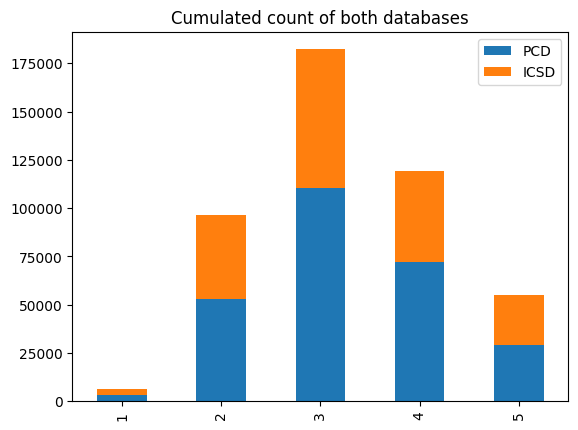

In [24]:
max_elm = 5

df = pd.DataFrame([[df_cleaned['ELEMENT_COUNT'].loc[(df_cleaned['DATABASE'] == 'PCD')].value_counts().loc[i] for i in range(1,max_elm+1)] ,[ df_cleaned['ELEMENT_COUNT'].loc[(df_cleaned['DATABASE'] == 'ICSD')].value_counts().loc[i] for i in range(1,max_elm+1)]], columns=list(range(1,max_elm+1))).transpose()
df.rename(columns={0:'PCD',1:'ICSD'}, inplace=True)

fig = df.plot(kind='bar', stacked=True).set(title='Cumulated count of both databases')

## Manipulate Data

let's load the cleaned dataset

In [5]:
df_cleaned = pd.read_pickle(data_pickle_cleaned)

Fill missing **temperature** and **pressure** values with standard room conditions. While it is possible that for some entries, the creators forgot to add the correct **temperature** & **pressure** values, this is only going to affect a very small subset of the larger dataset. Therefore we believe it is safe to assume that this will not have a major negative effect.

In [6]:
room_temp = 293.15
room_press = 101.325

df_filled = func.fill_missing_values(df_cleaned, room_temp, room_press)

Get an overview over the temperature values. We can see that some have 293K instead of the 293.15K listed in ICSD, which is probably due to the exact definitions of room temperature & pressure used. But a 0.15K difference shouldn't affect calculations too much (hopefully)

In [7]:
display(df_filled['TEMPERATURE'].value_counts(dropna=False))

293.15     349426
293.00      34877
298.00      13674
295.00       9968
300.00       9429
            ...  
178.60          1
171.40          1
385.10          1
360.70          1
2621.00         1
Name: TEMPERATURE, Length: 3061, dtype: int64

To get more reliable datapoints, we want to remove all materials that only have 1 or 2 corresponding entries in the dataset. This ensures that if a material hasn't been properly recorded, we still have at least 2 other valid datapoints.

By removing materials without enough entries, the dataset was modified to
Kept: 231408 entries, 33182 crystals
Deleted: 279777 entries, 230053 crystals


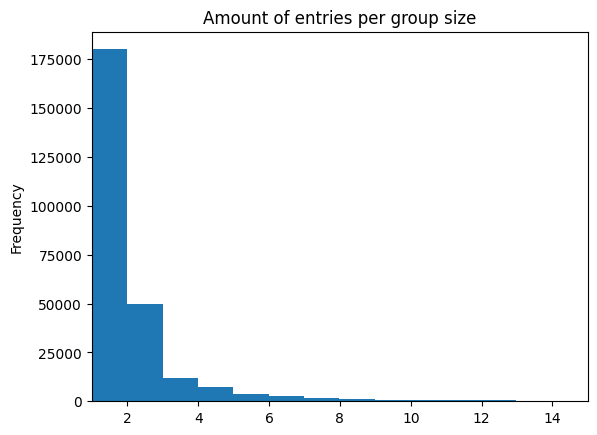

In [8]:
group_size = 3

df_restricted, entries = func.remove_few_entries(df_filled, group_size, ['FORMULA','SPACEGROUP_SYM'])

print('By removing materials without enough entries, the dataset was modified to')
print('Kept: ' + str(entries['kept entries']) + ' entries, ' + str(entries['kept crystals']) + ' crystals')
print('Deleted: ' + str(entries['removed entries']) + ' entries, ' + str(entries['removed crystals']) + ' crystals')

func.grouped_histogram(df_filled, 'Amount of entries per group size', ['FORMULA','SPACEGROUP_SYM'], (1,15))

While the dataset is much shorter now, there are still some loose NaN values. So we remove most of them to keep it to relevant entries.

In [18]:
df_removed, lengths = func.drop_NaN(df_restricted)

print('Removed ' + str(lengths['removed entries']) + ' entries')

Removed 7117 entries


Also to make future steps a bit easier, we can create a combined index out of `'FORMULA'` and `'SPACEGROUP_SYM'`

In [19]:
df_shortened = func.group_index(df_removed)

Now the dataset should be ready to calculate the coefficient of thermal expansion, so before that we create and additional save point for easier returning later!

In [ ]:
df_shortened.to_pickle(data_pickle_shortened)

And a look at the processed dataset:

In [20]:
display(df_shortened)

,ID,FORMULA,SPACEGROUP_SYM,SPCAEGROUP_NO,TEMPERATURE,CELL_LENGTH_A,CELL_LENGTH_B,CELL_LENGTH_C,ALPHA,BETA,...,PRESSURE,DENSITY,ELEMENT_COUNT,DATABASE,REFERENCE,@module,@class,charge,lattice,sites
group,,,,,,,,,,,,,,,,,,,,,
B1.0Ho1.0Ni4.0 P6/mmm,PCD_1000001,B1.0Ho1.0Ni4.0,P6/mmm,191,300.00,4.9696,4.9696,6.9419,90,90,...,101.325,9.18,3,PCD,"(2000) 215, 481-482",pymatgen.core.structure,Structure,0.0,"{'matrix': [[4.9696, 0.0, 3.043002366521343e-1...","[{'species': [{'element': 'Ho', 'occu': 1.0}],..."
Ag1.0Cu4.0Nd1.0 F-43m,PCD_1000005,Ag1.0Cu4.0Nd1.0,F-43m,216,293.15,7.234,7.234,7.234,90,90,...,101.325,8.88,3,PCD,"(1976) 34, 230-232",pymatgen.core.structure,Structure,0.0,"{'matrix': [[7.234, 0.0, 4.4295474725159767e-1...","[{'species': [{'element': 'Nd', 'occu': 1.0}],..."
Ag1.0Cu4.0Sm1.0 F-43m,PCD_1000006,Ag1.0Cu4.0Sm1.0,F-43m,216,293.15,7.186,7.186,7.186,90,90,...,101.325,9.17,3,PCD,"(1976) 34, 230-232",pymatgen.core.structure,Structure,0.0,"{'matrix': [[7.186, 0.0, 4.40015594933644e-16]...","[{'species': [{'element': 'Sm', 'occu': 1.0}],..."
Ag1.0Cu4.0Gd1.0 F-43m,PCD_1000007,Ag1.0Cu4.0Gd1.0,F-43m,216,293.15,7.163,7.163,7.163,90,90,...,101.325,9.39,3,PCD,"(1976) 34, 230-232",pymatgen.core.structure,Structure,0.0,"{'matrix': [[7.163, 0.0, 4.3860725111462456e-1...","[{'species': [{'element': 'Gd', 'occu': 1.0}],..."
Ag1.0Cu4.0Tb1.0 F-43m,PCD_1000008,Ag1.0Cu4.0Tb1.0,F-43m,216,293.15,7.148,7.148,7.148,90,90,...,101.325,9.48,3,PCD,"(1976) 34, 230-232",pymatgen.core.structure,Structure,0.0,"{'matrix': [[7.148, 0.0, 4.3768876601526403e-1...","[{'species': [{'element': 'Tb', 'occu': 1.0}],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cs2.0I6.0Sn1.0 Fm-3m,ICSD_760462,Cs2.0I6.0Sn1.0,Fm-3m,225,293.15,11.646,11.646,11.646,90.,90.,...,101.325,4.82,3,ICSD,"(nan) nan, nan-nan",pymatgen.core.structure,Structure,0.0,"{'matrix': [[11.646, 0.0, 7.131118311435038e-1...","[{'species': [{'element': 'Cs', 'oxidation_sta..."
Br6.0Cs2.0Sn1.0 Fm-3m,ICSD_760468,Br6.0Cs2.0Sn1.0,Fm-3m,225,293.15,11.646,11.646,11.646,90.,90.,...,101.325,3.63,3,ICSD,"(nan) nan, nan-nan",pymatgen.core.structure,Structure,0.0,"{'matrix': [[11.646, 0.0, 7.131118311435038e-1...","[{'species': [{'element': 'Cs', 'oxidation_sta..."
Fe1.0Se1.0 Cmma,ICSD_977900,Fe1.0Se1.0,Cmma,67,40.00,5.3104,5.3317,5.4879,90.,90.,...,101.325,5.76,2,ICSD,"(nan) nan, nan-nan",pymatgen.core.structure,Structure,0.0,"{'matrix': [[5.3104, 0.0, 3.2516821810960517e-...","[{'species': [{'element': 'Fe', 'oxidation_sta..."


## Calculate CTE

Define some variable to make processing them easier

In [21]:
a_str = 'CELL_LENGTH_A'
b_str = 'CELL_LENGTH_B'
c_str = 'CELL_LENGTH_C'
vol_str = 'VOLUME'

lattice_strs = [a_str, b_str, c_str, vol_str]
CTE_strs = ['CTE '+a_str, 'CTE '+b_str, 'CTE '+c_str, 'CTE '+vol_str]
CTE_dir_strs = CTE_strs[:3]
R2_strs = ['R^2 '+a_str, 'R^2 '+b_str, 'R^2 '+c_str, 'R^2 '+vol_str]

Once more, we load the previous dataframe (it's always a good idea to have many savepoints in between operations in order to not loose data)

In [ ]:
df_shortened = pd.read_pickle(data_pickle_shortened)

Next up, the dataset is binned. For this, the `max` and `min` values are used and all values in between are sorted into the closest bin (which is defined by the spacing).

In [22]:
spacing = 3

df_binned = func.temperature_bins(df_shortened, spacing)

Now the cell length & volume values are averaged for every temperature bin -> only one entry per material & bin should be left. **Important note:** since we use a pre-written function here, the pymatgen structure information is lost, as averaging over them is much harder. This issue is adressed later on, but for now we effectively have 2 dataframes that we need match & merge later on; 

1. The shortened dataframe
2. The CTE dataframe (which is much shorter)

In [23]:
df2_averaged = func.average_temperature(df_binned)

Now only one value per material & bin is visible in the dataset:

In [24]:
display(df2_averaged)

,TEMPERATURE,CELL_LENGTH_A,CELL_LENGTH_B,CELL_LENGTH_C,VOLUME
group,,,,,
Ac1.0Br3.0 P63/m,293.15,8.075000,8.075000,4.69000,264.845000
Ac1.0Cl3.0 P63/m,293.15,7.636667,7.636667,4.56000,230.303333
Ac1.0F1.0O1.0 Fm-3m,293.15,5.943000,5.943000,5.94300,209.900000
Ag0.01Mg2.0Si0.99 Fm-3m,293.15,6.356000,6.356000,6.35600,256.800000
Ag0.01Mg2.0Si0.99 Fm-3m,304.50,6.351500,6.351500,6.35150,256.250000
...,...,...,...,...,...
Zr1.0 P63/mmc,292.50,3.233200,3.233200,5.14660,46.590000
Zr1.0 P63/mmc,293.15,3.229812,3.229812,5.13983,46.440833
Zr1.0 P63/mmc,295.50,3.249650,3.249650,5.18260,47.400000


To calculate the CTE, we can only use materials where multiple different temperature values are known (as calculating CTE is effectively doing a linear regression -> the more points the better the result). So all materials with less than 3 temperature bins are removed.

In [25]:
df_cte_removed, entries = func.remove_few_entries(df2_averaged, 3, ['group'])

print('By removing materials without enough entries, the dataset was modified to')
print('Kept: ' + str(entries['kept entries']) + ' entries, ' + str(entries['kept crystals']) + ' crystals')
print('Deleted: ' + str(entries['removed entries']) + ' entries, ' + str(entries['removed crystals']) + ' crystals')

By removing materials without enough entries, the dataset was modified to
Kept: 40982 entries, 7818 crystals
Deleted: 34033 entries, 25336 crystals


This happens as expected:

In [26]:
display(df_cte_removed)

,TEMPERATURE,CELL_LENGTH_A,CELL_LENGTH_B,CELL_LENGTH_C,VOLUME
group,,,,,
Ag0.01Mg2.0Si0.99 Fm-3m,293.15,6.356000,6.356000,6.35600,256.800000
Ag0.01Mg2.0Si0.99 Fm-3m,304.50,6.351500,6.351500,6.35150,256.250000
Ag0.01Mg2.0Si0.99 Fm-3m,373.50,6.358000,6.358000,6.35800,257.000000
Ag0.01Mg2.0Si0.99 Fm-3m,424.50,6.363000,6.363000,6.36300,257.600000
Ag0.01Mg2.0Si0.99 Fm-3m,472.50,6.367500,6.367500,6.36750,258.150000
...,...,...,...,...,...
Zr1.0 P63/mmc,292.50,3.233200,3.233200,5.14660,46.590000
Zr1.0 P63/mmc,293.15,3.229812,3.229812,5.13983,46.440833
Zr1.0 P63/mmc,295.50,3.249650,3.249650,5.18260,47.400000


Now the linear regression can finally be done. Once this is calculated, the 1. dataframe mentioned above can be merged after only keeping one entry per material. Here the closest entry to room temperature was kept to ensure consistency for the features later on.

In [27]:
df_cte = func.CTE_reg(df_cte_removed, df_binned)

This results in one large unified dataframe with both the pymatgen structure and CTE calculations in it:

In [28]:
display(df_cte)

,ID,FORMULA,SPACEGROUP_SYM,SPCAEGROUP_NO,TEMPERATURE,CELL_LENGTH_A,CELL_LENGTH_B,CELL_LENGTH_C,ALPHA,BETA,...,lattice,sites,CTE CELL_LENGTH_A,R^2 CELL_LENGTH_A,CTE CELL_LENGTH_B,R^2 CELL_LENGTH_B,CTE CELL_LENGTH_C,R^2 CELL_LENGTH_C,CTE VOLUME,R^2 VOLUME
group,,,,,,,,,,,,,,,,,,,,,
Ag1.0Br1.0 Fm-3m,PCD_1000015,Ag1.0Br1.0,Fm-3m,225,293.15,5.8780,5.8780,5.8780,90,90,...,"{'matrix': [[5.878, 0.0, 3.5992369426940714e-1...","[{'species': [{'element': 'Ag', 'occu': 1.0}],...",0.000035,0.400586,0.000035,0.400586,0.000035,0.400586,0.000105,0.407196
H1.0O8.0Rb3.0Se2.0 C12/c1,PCD_1000018,H1.0O8.0Rb3.0Se2.0,C12/c1,15,292.50,15.4180,6.0900,10.4750,90,102.91,...,"{'matrix': [[15.028267108544334, 0.0, -3.44469...","[{'species': [{'element': 'Rb', 'occu': 1.0}],...",0.000030,0.994583,0.000030,0.992260,0.000031,0.992260,0.000089,0.994170
K1.0O5.0P1.0Ti1.0 Pna21,PCD_1000028,K1.0O5.0P1.0Ti1.0,Pna21,33,293.15,12.8300,6.4100,10.6100,90,90,...,"{'matrix': [[12.83, 0.0, 7.856109216530271e-16...","[{'species': [{'element': 'K', 'occu': 1.0}], ...",0.000012,0.926936,0.000014,0.975519,-0.000002,0.975519,0.000023,0.848695
Na5.0O12.0Si4.0Y1.0 R-3ch,PCD_1000032,Na5.0O12.0Si4.0Y1.0,R-3ch,167,293.15,22.0350,22.0350,12.6040,90,90,...,"{'matrix': [[22.035, 0.0, 1.3492546109605965e-...","[{'species': [{'element': 'Na', 'occu': 1.0}],...",0.000010,0.864351,0.000010,0.864351,0.000021,0.864351,0.000040,0.956183
Ba3.0Na1.0Nd3.0O20.0Si6.0 Ama2,PCD_1000039,Ba3.0Na1.0Nd3.0O20.0Si6.0,Ama2,40,293.15,14.8300,24.1360,5.5900,90,90,...,"{'matrix': [[14.83, 0.0, 9.080756015677624e-16...","[{'species': [{'element': 'Ba', 'occu': 1.0}],...",0.000005,0.169806,0.000081,0.169806,0.000001,0.169806,0.000088,0.175244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Co1.0Cr1.0Fe1.0P1.0 F-43m,ICSD_681276,Co1.0Cr1.0Fe1.0P1.0,F-43m,216,293.15,5.9000,5.9000,5.9000,90.,90.,...,"{'matrix': [[5.9, 0.0, 3.612708057484692e-16],...","[{'species': [{'element': 'Cr', 'oxidation_sta...",0.000002,0.033880,0.000002,0.033880,0.000002,0.033880,0.000005,0.019412
Cr2.0Gd1.0Ge1.0 F-43m,ICSD_681407,Cr2.0Gd1.0Ge1.0,F-43m,216,293.15,6.4549,6.4549,6.4549,90.,90.,...,"{'matrix': [[6.4549, 0.0, 3.952486311908125e-1...","[{'species': [{'element': 'Gd', 'oxidation_sta...",0.000005,0.999173,0.000005,0.999173,0.000005,0.999173,0.000015,0.999138
Cr2.0Gd1.0Sn1.0 F-43m,ICSD_681411,Cr2.0Gd1.0Sn1.0,F-43m,216,293.15,6.6875,6.6875,6.6875,90.,90.,...,"{'matrix': [[6.6875, 0.0, 4.0949127346489624e-...","[{'species': [{'element': 'Gd', 'oxidation_sta...",0.000005,0.977880,0.000005,0.977880,0.000005,0.977880,0.000015,0.977488


Unfortunately some CTE values have very bad R^2 values (meaning they could not be fitted well to a linear regression). By removing those that fall below a certain threshold `R2_min`, only the ones that make some sense are kept.

Remaining unique materials: 4024


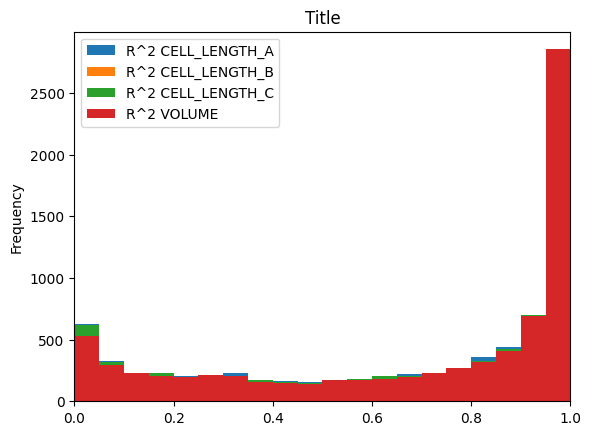

In [30]:
R2_min = 0.7

df_cte_restricted = func.restrict_col(df_cte, R2_strs, 1, R2_min)

print("Remaining unique materials: " + str(len(df_cte_restricted)))
func.column_histogram(df_cte, ['R^2 CELL_LENGTH_A', 'R^2 CELL_LENGTH_B', 'R^2 CELL_LENGTH_C', 'R^2 VOLUME'], 'Title', 20, (0, 1))

To be able to use machine learning, the results have to be classified into positive CTE (0) and negative CTE (1) and some other ones that can be used for the machine learning later on.

In [ ]:
clf_large_tresh = -2*10**(-5)

df_cte_restricted.reset_index(inplace=True)
df_cte_classified = func.CTE_classification(df_cte_restricted, clf_large_tresh)

In [ ]:
display(df_cte_classified)

,ID,FORMULA,SPACEGROUP_SYM,SPCAEGROUP_NO,TEMPERATURE,CELL_LENGTH_A,CELL_LENGTH_B,CELL_LENGTH_C,ALPHA,BETA,...,R^2 CELL_LENGTH_A,CTE CELL_LENGTH_B,R^2 CELL_LENGTH_B,CTE CELL_LENGTH_C,R^2 CELL_LENGTH_C,CTE VOLUME,R^2 VOLUME,dir NTE,dir NTE large,vol NTE
group,,,,,,,,,,,,,,,,,,,,,
H1.0O8.0Rb3.0Se2.0 C12/c1,PCD_1000018,H1.0O8.0Rb3.0Se2.0,C12/c1,15,292.50,15.4180,6.0900,10.4750,90,102.91,...,0.994583,0.000030,0.992260,0.000031,0.992260,0.000089,0.994170,0,0,0
K1.0O5.0P1.0Ti1.0 Pna21,PCD_1000028,K1.0O5.0P1.0Ti1.0,Pna21,33,293.15,12.8300,6.4100,10.6100,90,90,...,0.926936,0.000014,0.975519,-0.000002,0.975519,0.000023,0.848695,1,0,0
Na5.0O12.0Si4.0Y1.0 R-3ch,PCD_1000032,Na5.0O12.0Si4.0Y1.0,R-3ch,167,293.15,22.0350,22.0350,12.6040,90,90,...,0.864351,0.000010,0.864351,0.000021,0.864351,0.000040,0.956183,0,0,0
Ga1.0O4.0P1.0 P3121,PCD_1000082,Ga1.0O4.0P1.0,P3121,152,293.15,4.9000,4.9000,11.0480,90,90,...,0.853655,0.000019,0.853655,0.000006,0.853655,0.000044,0.846536,0,0,0
Fe1.0Gd1.0O3.0 Pnma,PCD_1000182,Fe1.0Gd1.0O3.0,Pnma,62,293.15,5.6110,7.6690,5.3490,90,90,...,0.999448,-0.001401,0.988641,-0.001338,0.988641,-0.004186,0.999986,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ge1.0Te1.0 R-3mH,ICSD_600605,Ge1.0Te1.0,R-3mH,166,293.15,8.3300,8.3300,10.6600,90.,90.,...,0.827950,0.000227,0.827950,0.000124,0.827950,0.000578,0.725656,0,0,0
As1.0Co1.0Cr1.0Fe1.0 F-43m,ICSD_680179,As1.0Co1.0Cr1.0Fe1.0,F-43m,216,293.15,5.7420,5.7420,5.7420,90.,90.,...,0.736888,0.000007,0.736888,0.000007,0.736888,0.000022,0.734716,0,0,0
Co1.0Cr1.0Fe1.0Sb1.0 F-43m,ICSD_680180,Co1.0Cr1.0Fe1.0Sb1.0,F-43m,216,293.15,5.7640,5.7640,5.7640,90.,90.,...,0.971553,0.000012,0.971553,0.000012,0.971553,0.000035,0.973392,0,0,0


In [ ]:
CTE_restrict = 500*10**(-6)

df_CTE = func.restrict_col(df_cte_classified, CTE_strs, CTE_restrict, -CTE_restrict)

In [ ]:
display(df_CTE)

,ID,FORMULA,SPACEGROUP_SYM,SPCAEGROUP_NO,TEMPERATURE,CELL_LENGTH_A,CELL_LENGTH_B,CELL_LENGTH_C,ALPHA,BETA,...,R^2 CELL_LENGTH_A,CTE CELL_LENGTH_B,R^2 CELL_LENGTH_B,CTE CELL_LENGTH_C,R^2 CELL_LENGTH_C,CTE VOLUME,R^2 VOLUME,dir NTE,dir NTE large,vol NTE
group,,,,,,,,,,,,,,,,,,,,,
H1.0O8.0Rb3.0Se2.0 C12/c1,PCD_1000018,H1.0O8.0Rb3.0Se2.0,C12/c1,15,292.50,15.4180,6.0900,10.4750,90,102.91,...,0.994583,0.000030,0.992260,0.000031,0.992260,0.000089,0.994170,0,0,0
K1.0O5.0P1.0Ti1.0 Pna21,PCD_1000028,K1.0O5.0P1.0Ti1.0,Pna21,33,293.15,12.8300,6.4100,10.6100,90,90,...,0.926936,0.000014,0.975519,-0.000002,0.975519,0.000023,0.848695,1,0,0
Na5.0O12.0Si4.0Y1.0 R-3ch,PCD_1000032,Na5.0O12.0Si4.0Y1.0,R-3ch,167,293.15,22.0350,22.0350,12.6040,90,90,...,0.864351,0.000010,0.864351,0.000021,0.864351,0.000040,0.956183,0,0,0
Ga1.0O4.0P1.0 P3121,PCD_1000082,Ga1.0O4.0P1.0,P3121,152,293.15,4.9000,4.9000,11.0480,90,90,...,0.853655,0.000019,0.853655,0.000006,0.853655,0.000044,0.846536,0,0,0
K2.0O4.0S1.0 Pnma,PCD_1000194,K2.0O4.0S1.0,Pnma,62,293.15,7.4760,5.7630,10.0710,90,90,...,0.905891,0.000044,0.962103,0.000039,0.962103,0.000156,0.939894,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Br6.0Cs4.0Sn1.0 R-3cH,ICSD_434641,Br6.0Cs4.0Sn1.0,R-3cH,167,271.50,13.6687,13.6687,17.2597,90.,90.,...,0.995460,0.000045,0.995460,0.000032,0.995460,0.000121,0.996790,0,0,0
As1.0Co1.0Cr1.0Fe1.0 F-43m,ICSD_680179,As1.0Co1.0Cr1.0Fe1.0,F-43m,216,293.15,5.7420,5.7420,5.7420,90.,90.,...,0.736888,0.000007,0.736888,0.000007,0.736888,0.000022,0.734716,0,0,0
Co1.0Cr1.0Fe1.0Sb1.0 F-43m,ICSD_680180,Co1.0Cr1.0Fe1.0Sb1.0,F-43m,216,293.15,5.7640,5.7640,5.7640,90.,90.,...,0.971553,0.000012,0.971553,0.000012,0.971553,0.000035,0.973392,0,0,0


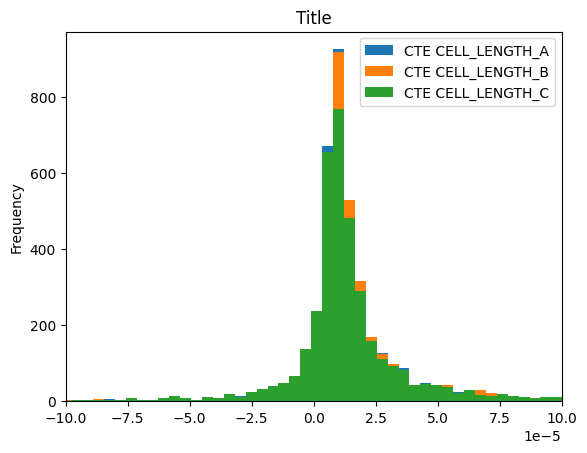

In [ ]:
func.column_histogram(df_CTE, ['CTE CELL_LENGTH_A', 'CTE CELL_LENGTH_B', 'CTE CELL_LENGTH_C'], 'Title', 200, (-100*10**(-6),100*10**(-6)))

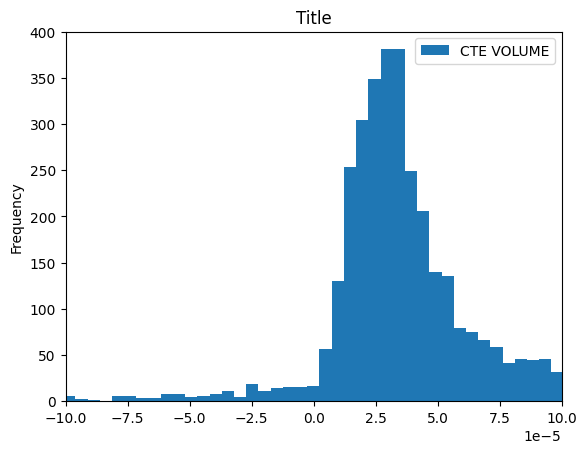

In [ ]:
func.column_histogram(df_CTE, ['CTE VOLUME'], 'Title', 200, (-100*10**(-6),100*10**(-6)))

In [ ]:
df_CTE['idx'] = range(0, len(df_CTE))

In [ ]:
display(df_CTE)

,ID,FORMULA,SPACEGROUP_SYM,SPCAEGROUP_NO,TEMPERATURE,CELL_LENGTH_A,CELL_LENGTH_B,CELL_LENGTH_C,ALPHA,BETA,...,CTE CELL_LENGTH_B,R^2 CELL_LENGTH_B,CTE CELL_LENGTH_C,R^2 CELL_LENGTH_C,CTE VOLUME,R^2 VOLUME,dir NTE,dir NTE large,vol NTE,idx
group,,,,,,,,,,,,,,,,,,,,,
H1.0O8.0Rb3.0Se2.0 C12/c1,PCD_1000018,H1.0O8.0Rb3.0Se2.0,C12/c1,15,292.50,15.4180,6.0900,10.4750,90,102.91,...,0.000030,0.992260,0.000031,0.992260,0.000089,0.994170,0,0,0,0
K1.0O5.0P1.0Ti1.0 Pna21,PCD_1000028,K1.0O5.0P1.0Ti1.0,Pna21,33,293.15,12.8300,6.4100,10.6100,90,90,...,0.000014,0.975519,-0.000002,0.975519,0.000023,0.848695,1,0,0,1
Na5.0O12.0Si4.0Y1.0 R-3ch,PCD_1000032,Na5.0O12.0Si4.0Y1.0,R-3ch,167,293.15,22.0350,22.0350,12.6040,90,90,...,0.000010,0.864351,0.000021,0.864351,0.000040,0.956183,0,0,0,2
Ga1.0O4.0P1.0 P3121,PCD_1000082,Ga1.0O4.0P1.0,P3121,152,293.15,4.9000,4.9000,11.0480,90,90,...,0.000019,0.853655,0.000006,0.853655,0.000044,0.846536,0,0,0,3
K2.0O4.0S1.0 Pnma,PCD_1000194,K2.0O4.0S1.0,Pnma,62,293.15,7.4760,5.7630,10.0710,90,90,...,0.000044,0.962103,0.000039,0.962103,0.000156,0.939894,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Br6.0Cs4.0Sn1.0 R-3cH,ICSD_434641,Br6.0Cs4.0Sn1.0,R-3cH,167,271.50,13.6687,13.6687,17.2597,90.,90.,...,0.000045,0.995460,0.000032,0.995460,0.000121,0.996790,0,0,0,3743
As1.0Co1.0Cr1.0Fe1.0 F-43m,ICSD_680179,As1.0Co1.0Cr1.0Fe1.0,F-43m,216,293.15,5.7420,5.7420,5.7420,90.,90.,...,0.000007,0.736888,0.000007,0.736888,0.000022,0.734716,0,0,0,3744
Co1.0Cr1.0Fe1.0Sb1.0 F-43m,ICSD_680180,Co1.0Cr1.0Fe1.0Sb1.0,F-43m,216,293.15,5.7640,5.7640,5.7640,90.,90.,...,0.000012,0.971553,0.000012,0.971553,0.000035,0.973392,0,0,0,3745


In [ ]:
df_CTE.to_pickle(data_pickle_CTE)